In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz 
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import pydotplus
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')
from sklearn import linear_model
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv("data.csv")
data.shape

(1340, 28)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 28 columns):
product_id       1340 non-null int64
calendar_date    1340 non-null object
volume_sold      1340 non-null int64
revenue          1340 non-null float64
cost             1340 non-null float64
vdm1             1340 non-null int64
vwm1             1340 non-null int64
vmm1             1340 non-null int64
vmm2             1340 non-null int64
vmm13            1340 non-null int64
rdm1             1340 non-null float64
rwm1             1340 non-null float64
rmm1             1340 non-null float64
rmm2             1340 non-null float64
rmm13            1340 non-null float64
cdm1             1340 non-null float64
cwm1             1340 non-null float64
cmm1             1340 non-null float64
cmm2             1340 non-null float64
cmm13            1340 non-null float64
mpdm1            1340 non-null float64
mpwm1            1340 non-null float64
mpmm1            1340 non-null float64
mpmm2      

In [4]:
data.head()

,product_id,calendar_date,volume_sold,revenue,cost,vdm1,vwm1,vmm1,vmm2,vmm13,...,cmm2,cmm13,mpdm1,mpwm1,mpmm1,mpmm2,mpmm13,stock_level,retail_price,woy
0,158737,1/8/2017,3,1007.4000,488.690,8,143,3119,3230,2852,...,501940.808,455934.100,342.700,342.7000,342.7000,358.8000,342.70,2811,244.225444,1.0
1,158105,1/4/2017,3,863.4890,457.173,1,24,1327,1401,1476,...,215765.295,259145.317,284.924,321.6895,321.6895,321.6895,303.60,15513,243.738629,1.0
2,158105,1/5/2017,5,1470.1025,766.953,3,15,1433,1951,3189,...,303387.678,557139.366,293.641,321.6895,321.6895,321.6895,303.60,29592,263.226347,1.0
3,13701,1/8/2017,119,7499.3800,5087.746,227,1346,10729,23451,49091,...,968232.669,2196785.732,63.020,63.0200,63.0200,63.0200,63.02,2276,107.835444,1.0
4,13701,1/7/2017,226,14242.5200,9648.065,278,1121,10585,18571,43352,...,766785.241,1941469.462,63.020,63.0200,63.0200,63.0200,63.02,2323,107.835444,1.0


In [5]:
data.describe()

,product_id,volume_sold,revenue,cost,vdm1,vwm1,vmm1,vmm2,vmm13,rdm1,...,cmm2,cmm13,mpdm1,mpwm1,mpmm1,mpmm2,mpmm13,stock_level,retail_price,woy
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1.340000e+03,1.340000e+03,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,89161.750000,193.927612,15448.059799,11541.669746,197.832836,1428.526119,6084.043284,6849.710448,10153.123134,15932.043272,...,4.049980e+05,5.343114e+05,163.009454,182.118670,197.970677,197.118489,193.206994,4352.447761,161.088855,24.441791
std,69424.201439,413.579751,33821.472164,27346.646313,422.501877,2520.067440,7659.197320,8544.359303,31867.149890,36772.136686,...,3.980681e+05,8.744018e+05,135.199464,143.753699,150.046406,148.806945,142.344725,4547.028966,81.568966,13.841589
min,13701.000000,-209.000000,-3779.360000,-3323.100000,-419.000000,-176.000000,-405.000000,0.000000,134.000000,-7595.060000,...,0.000000e+00,8.471719e+03,0.000000,0.000000,0.000000,0.000000,27.140000,-776.000000,27.140000,1.000000
25%,23003.250000,6.000000,1084.044625,589.323750,6.000000,71.000000,1235.750000,1529.000000,1471.250000,1197.256375,...,1.012611e+05,9.805597e+04,36.340000,50.140000,63.020000,63.020000,58.190000,1736.750000,85.381694,12.000000
50%,92104.500000,54.000000,4022.332000,2307.788500,59.500000,560.500000,2491.500000,2741.500000,3153.500000,4512.772500,...,2.903940e+05,2.889900e+05,69.575000,142.016154,212.010904,212.010904,182.114000,2955.000000,152.650888,24.000000
75%,158263.000000,171.250000,17532.940250,12089.563750,177.000000,1335.250000,7245.250000,9366.750000,13485.000000,18262.966000,...,5.561044e+05,7.178380e+05,321.689500,324.978500,340.975000,340.975000,342.700000,5835.250000,244.225444,36.000000
max,158737.000000,4909.000000,851529.000000,702025.168000,5660.000000,13432.000000,59781.000000,110551.000000,799832.000000,996590.000000,...,2.635636e+06,1.543953e+07,401.350000,401.350000,401.350000,401.350000,358.800000,56709.000000,333.950127,52.000000


In [6]:
data['product_id'].value_counts()

26104     335
13701     335
158737    335
158105    335
Name: product_id, dtype: int64

In [7]:
data_26104 = data.loc[data['product_id'] == 158105]

In [8]:
data_26104.shape

(335, 28)

In [9]:
pd.set_option('display.max_columns', 500)
data_26104.describe()

,product_id,volume_sold,revenue,cost,vdm1,vwm1,vmm1,vmm2,vmm13,rdm1,rwm1,rmm1,rmm2,rmm13,cdm1,cwm1,cmm1,cmm2,cmm13,mpdm1,mpwm1,mpmm1,mpmm2,mpmm13,stock_level,retail_price,woy
count,335.0,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,3.350000e+02,3.350000e+02,3.350000e+02,3.350000e+02,335.000000,3.350000e+02,3.350000e+02,3.350000e+02,3.350000e+02,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,158105.0,66.558209,13888.572451,9590.416791,70.800000,534.331343,2421.758209,2578.504478,4309.629851,14810.715982,1.113074e+05,5.061074e+05,5.420764e+05,8.150945e+05,10173.531830,7.700615e+04,3.487626e+05,3.716194e+05,6.736025e+05,274.290799,305.642866,326.232240,326.039384,319.965530,6591.483582,230.945119,24.441791
std,0.0,274.738518,48174.506749,39291.882788,314.806221,1008.090901,2121.602814,2364.746307,5828.080086,55841.875444,1.793238e+05,3.810582e+05,4.329063e+05,9.160106e+05,44467.227567,1.446169e+05,2.994528e+05,3.315137e+05,8.868529e+05,66.979869,40.183758,5.516006,5.719029,11.702795,6469.573229,33.893073,13.857121
min,158105.0,0.000000,0.000000,0.000000,0.000000,15.000000,145.000000,151.000000,134.000000,0.000000,4.389964e+03,4.392043e+04,4.558384e+04,3.954367e+04,0.000000,2.289552e+03,2.232898e+04,2.205658e+04,2.369488e+04,0.000000,195.500000,321.689500,321.689500,301.208000,0.000000,152.650888,1.000000
25%,158105.0,4.000000,1287.379000,634.186500,5.000000,57.500000,1081.500000,1264.000000,1179.000000,1509.944250,1.713679e+04,2.473106e+05,2.967169e+05,2.910231e+05,741.805000,8.640830e+03,1.564508e+05,1.829223e+05,1.829273e+05,218.960000,321.689500,322.000000,322.000000,312.800000,2548.000000,196.500444,12.500000
50%,158105.0,10.000000,2831.633500,1392.289000,11.000000,121.000000,1798.000000,1805.000000,2018.000000,3360.760000,3.441220e+04,3.995908e+05,4.106965e+05,5.017225e+05,1649.721000,1.781783e+04,2.627252e+05,2.634809e+05,3.190000e+05,296.665500,322.000000,324.978500,322.000000,320.033500,4825.000000,237.325444,24.000000
75%,158105.0,103.000000,23056.488000,15001.098500,105.500000,773.000000,2896.000000,2793.500000,4937.000000,23223.652000,1.692561e+05,6.416324e+05,6.219625e+05,9.426807e+05,15036.500500,1.101313e+05,4.232712e+05,4.098012e+05,7.996486e+05,322.000000,324.978500,329.360000,329.360000,321.689500,9016.000000,260.298629,36.000000
max,158105.0,4909.000000,851529.000000,702025.168000,5660.000000,9388.000000,12891.000000,12417.000000,41257.000000,996590.000000,1.613141e+06,2.290354e+06,2.330962e+06,6.751975e+06,798917.024000,1.339695e+06,1.833029e+06,1.834418e+06,6.314776e+06,340.400000,340.400000,340.400000,340.400000,347.760000,56709.000000,283.633111,52.000000


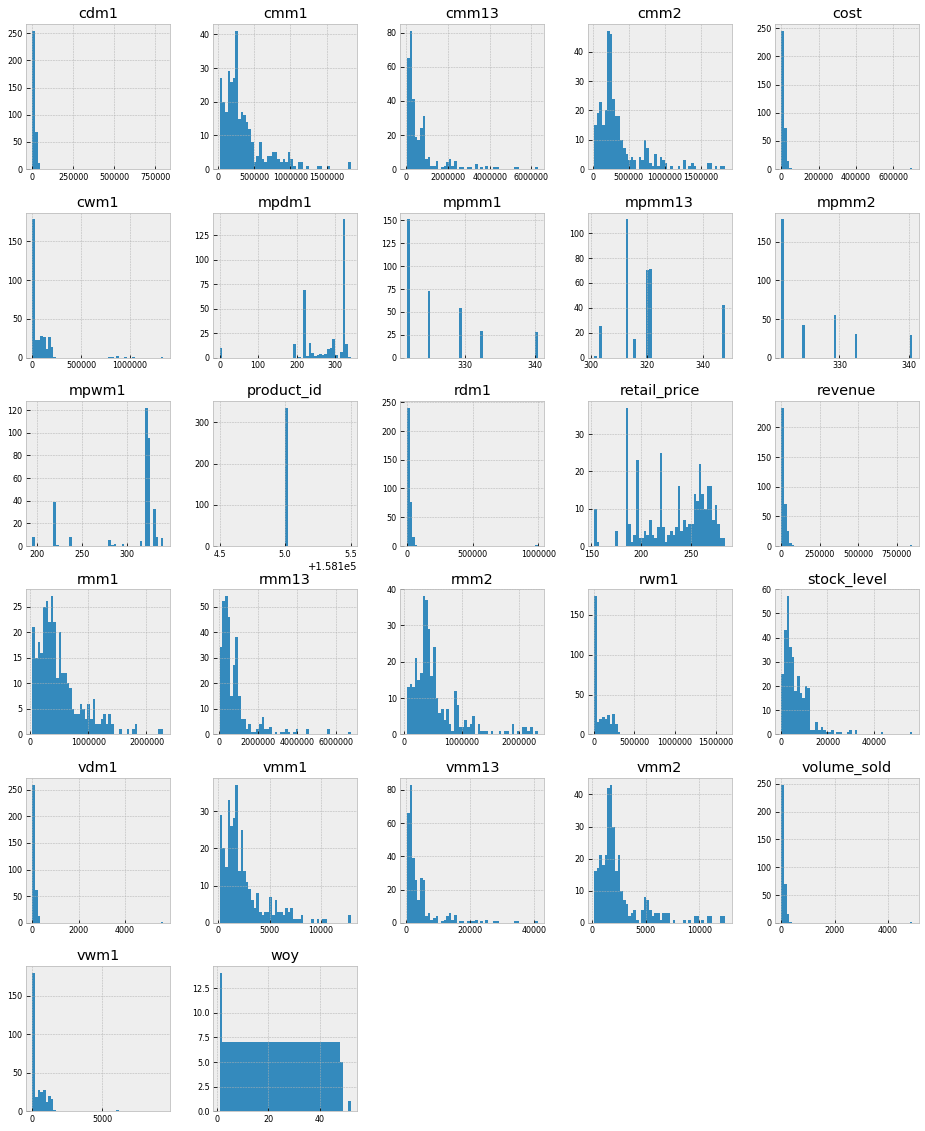

In [10]:
# Check and visualize the distributions
plt.figure(figsize=(9, 8))
data_26104.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

{'boxes': [<matplotlib.lines.Line2D at 0x1a1c1e1f60>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1c252080>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2b7ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d4b2320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1c1f54e0>,
  <matplotlib.lines.Line2D at 0x1a1c21e160>]}

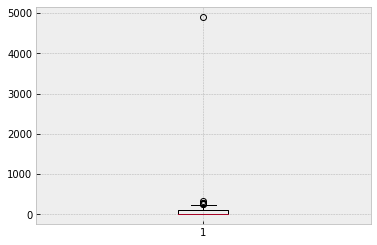

In [11]:
plt.boxplot(data_26104["volume_sold"])

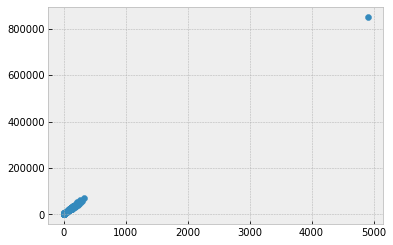

In [12]:
plt.scatter(data_26104.volume_sold, data_26104.revenue);

In [13]:
volume_df = []
vol_bin = pd.DataFrame()
# For each row in the column,
for row in data_26104['volume_sold']:
    # if more than a value,
    if row >= 1000:
       volume_df.append('1000+')
    elif (row >= 500) & (row < 1000):
        volume_df.append('500-1000')
    elif (row >= 250) & (row < 500):
        volume_df.append('250-500')
    elif (row >= 100) & (row < 250):
        volume_df.append('100-250')
    elif (row > 75) & (row <= 100):
        volume_df.append('75-100')
    elif (row >= 50) & (row < 75):
        volume_df.append('50-75')
    elif (row >= 25) & (row < 50):
        volume_df.append('25-50')    
    elif  row < 25:
        volume_df.append('Less than 20')
    else:
        # Append a failing grade
        volume_df.append('NA')
        
data_26104['bins'] = pd.DataFrame(volume_df)

In [14]:
data_26104['bins'].value_counts()

Less than 20    45
100-250         28
75-100           6
50-75            2
250-500          2
25-50            1
Name: bins, dtype: int64

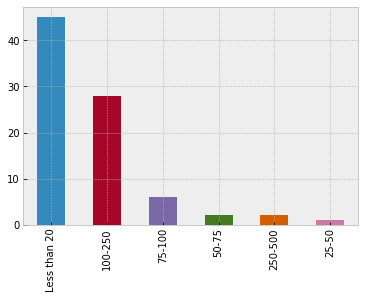

In [15]:
data_26104['bins'].value_counts().plot(kind='bar')

In [16]:
data_26104['vol_last_week_daily'] = (data_26104.vwm1)/7

In [17]:
data_26104['vol_last_month_daily'] = (data_26104.vmm1)/28

In [18]:
data_26104['vol_last_2month_daily'] = (data_26104.vmm2)/28

In [19]:
data_26104['vol_last_year_daily'] = (data_26104.vmm13)/28

In [20]:
data_26104['rev_last_week_daily'] = (data_26104. rwm1)/7
data_26104['rev_last_month_daily'] = (data_26104. rmm1)/28
data_26104['rev_last_2month_daily'] = (data_26104. rmm2)/28
data_26104['rev_last_year_daily'] = (data_26104. rmm13)/28

data_26104['cost_last_week_daily'] = (data_26104. cwm1)/7
data_26104['cost_last_month_daily'] = (data_26104. cmm1)/28
data_26104['cost_last_2month_daily'] = (data_26104. cmm2)/28
data_26104['cost_last_year_daily'] = (data_26104. cmm13)/28

data_26104['price_last_week_daily'] = (data_26104. mpwm1)/7
data_26104['price_last_month_daily'] = (data_26104. mpmm1)/28
data_26104['price_last_2month_daily'] = (data_26104. mpmm2)/28
data_26104['price_last_year_daily'] = (data_26104. mpmm13)/28

In [21]:
data_26104.drop(['vwm1', 'vmm1', 'vmm2', 'vmm13', 'rwm1', 'rmm1', 'rmm2', 'rmm13', 'cwm1', 'cmm1', 'cmm2', 'cmm13', 'mpwm1', 'mpmm1', 'mpmm2', 'mpmm13','woy','product_id','bins'], axis=1, inplace=True)



In [22]:
data_26104.head()

,calendar_date,volume_sold,revenue,cost,vdm1,rdm1,cdm1,mpdm1,stock_level,retail_price,vol_last_week_daily,vol_last_month_daily,vol_last_2month_daily,vol_last_year_daily,rev_last_week_daily,rev_last_month_daily,rev_last_2month_daily,rev_last_year_daily,cost_last_week_daily,cost_last_month_daily,cost_last_2month_daily,cost_last_year_daily,price_last_week_daily,price_last_month_daily,price_last_2month_daily,price_last_year_daily
1,1/4/2017,3,863.4890,457.173,1,284.9240,151.698,284.9240,15513,243.738629,3.428571,47.392857,50.035714,52.714286,1018.484357,11680.506464,12193.408107,11854.195071,526.978286,7329.316000,7705.903393,9255.189893,45.955643,11.488911,11.488911,10.842857
2,1/5/2017,5,1470.1025,766.953,3,863.4890,457.173,293.6410,29592,263.226347,2.142857,51.178571,69.678571,113.892857,627.137714,12412.957071,17246.054268,25767.683643,327.078857,7973.947929,10835.274214,19897.834500,45.955643,11.488911,11.488911,10.842857
8,1/6/2017,3,854.7720,456.425,6,1763.7435,920.313,321.6895,4350,218.787444,2.714286,21.928571,38.892857,29.107143,793.687286,5456.721661,9430.677679,6616.779643,414.765571,3375.912250,5979.696714,5112.328143,45.955643,11.488911,11.488911,10.842857
9,1/7/2017,4,1138.3390,609.785,3,854.7720,456.425,284.9240,25020,251.516472,2.714286,22.250000,51.607143,32.714286,791.196714,5561.357696,12538.731339,7702.954643,414.480857,3424.595536,7933.870393,6096.298393,45.955643,11.488911,11.488911,10.842857
11,1/8/2017,2,581.8540,307.180,4,1138.3390,609.785,293.6410,7224,221.788944,2.714286,27.000000,63.607143,40.500000,791.002857,6838.242946,15410.935196,9376.543893,414.848857,4118.042679,9722.338500,7074.931786,45.955643,11.488911,11.488911,10.842857


In [23]:
data_26104 = data_26104.rename(index=str, columns={"vdm1": "vol_yesterday", "rdm1": "rev_yesterday", "cdm1": "cost_yesterday", "mpdm1": "price_yesterday"})

In [24]:
data_26104.head()

,calendar_date,volume_sold,revenue,cost,vol_yesterday,rev_yesterday,cost_yesterday,price_yesterday,stock_level,retail_price,vol_last_week_daily,vol_last_month_daily,vol_last_2month_daily,vol_last_year_daily,rev_last_week_daily,rev_last_month_daily,rev_last_2month_daily,rev_last_year_daily,cost_last_week_daily,cost_last_month_daily,cost_last_2month_daily,cost_last_year_daily,price_last_week_daily,price_last_month_daily,price_last_2month_daily,price_last_year_daily
1,1/4/2017,3,863.4890,457.173,1,284.9240,151.698,284.9240,15513,243.738629,3.428571,47.392857,50.035714,52.714286,1018.484357,11680.506464,12193.408107,11854.195071,526.978286,7329.316000,7705.903393,9255.189893,45.955643,11.488911,11.488911,10.842857
2,1/5/2017,5,1470.1025,766.953,3,863.4890,457.173,293.6410,29592,263.226347,2.142857,51.178571,69.678571,113.892857,627.137714,12412.957071,17246.054268,25767.683643,327.078857,7973.947929,10835.274214,19897.834500,45.955643,11.488911,11.488911,10.842857
8,1/6/2017,3,854.7720,456.425,6,1763.7435,920.313,321.6895,4350,218.787444,2.714286,21.928571,38.892857,29.107143,793.687286,5456.721661,9430.677679,6616.779643,414.765571,3375.912250,5979.696714,5112.328143,45.955643,11.488911,11.488911,10.842857
9,1/7/2017,4,1138.3390,609.785,3,854.7720,456.425,284.9240,25020,251.516472,2.714286,22.250000,51.607143,32.714286,791.196714,5561.357696,12538.731339,7702.954643,414.480857,3424.595536,7933.870393,6096.298393,45.955643,11.488911,11.488911,10.842857
11,1/8/2017,2,581.8540,307.180,4,1138.3390,609.785,293.6410,7224,221.788944,2.714286,27.000000,63.607143,40.500000,791.002857,6838.242946,15410.935196,9376.543893,414.848857,4118.042679,9722.338500,7074.931786,45.955643,11.488911,11.488911,10.842857


In [25]:
data_26104.describe()

,volume_sold,revenue,cost,vol_yesterday,rev_yesterday,cost_yesterday,price_yesterday,stock_level,retail_price,vol_last_week_daily,vol_last_month_daily,vol_last_2month_daily,vol_last_year_daily,rev_last_week_daily,rev_last_month_daily,rev_last_2month_daily,rev_last_year_daily,cost_last_week_daily,cost_last_month_daily,cost_last_2month_daily,cost_last_year_daily,price_last_week_daily,price_last_month_daily,price_last_2month_daily,price_last_year_daily
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,66.558209,13888.572451,9590.416791,70.800000,14810.715982,10173.531830,274.290799,6591.483582,230.945119,76.333049,86.491365,92.089446,153.915352,15901.060794,18075.265463,19359.872581,29110.518199,11000.878966,12455.807425,13272.120086,24057.233555,43.663267,11.651151,11.644264,11.427340
std,274.738518,48174.506749,39291.882788,314.806221,55841.875444,44467.227567,66.979869,6469.573229,33.893073,144.012986,75.771529,84.455225,208.145717,25617.687160,13609.221589,15460.937794,32714.665929,20659.556158,10694.741365,11839.776260,31673.318339,5.740537,0.197000,0.204251,0.417957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.650888,2.142857,5.178571,5.392857,4.785714,627.137714,1568.586857,1627.994214,1412.273929,327.078857,797.463429,787.735179,846.245786,27.928571,11.488911,11.488911,10.757429
25%,4.000000,1287.379000,634.186500,5.000000,1509.944250,741.805000,218.960000,2548.000000,196.500444,8.214286,38.625000,45.142857,42.107143,2448.112607,8832.521812,10597.031089,10393.682955,1234.404286,5587.530125,6532.939571,6533.117750,45.955643,11.500000,11.500000,11.171429
50%,10.000000,2831.633500,1392.289000,11.000000,3360.760000,1649.721000,296.665500,4825.000000,237.325444,17.285714,64.214286,64.464286,72.071429,4916.028214,14271.099554,14667.731268,17918.660518,2545.404286,9383.041786,9410.033393,11392.858571,46.000000,11.606375,11.500000,11.429768
75%,103.000000,23056.488000,15001.098500,105.500000,23223.652000,15036.500500,322.000000,9016.000000,260.298629,110.428571,103.428571,99.767857,176.321429,24179.440000,22915.443170,22212.947393,33667.169589,15733.041500,15116.828179,14635.758821,28558.879250,46.425500,11.762857,11.762857,11.488911
max,4909.000000,851529.000000,702025.168000,5660.000000,996590.000000,798917.024000,340.400000,56709.000000,283.633111,1341.142857,460.392857,443.464286,1473.464286,230448.772714,81798.357821,83248.656071,241141.982000,191385.011571,65465.321857,65514.943857,225527.728857,48.628571,12.157143,12.157143,12.420000


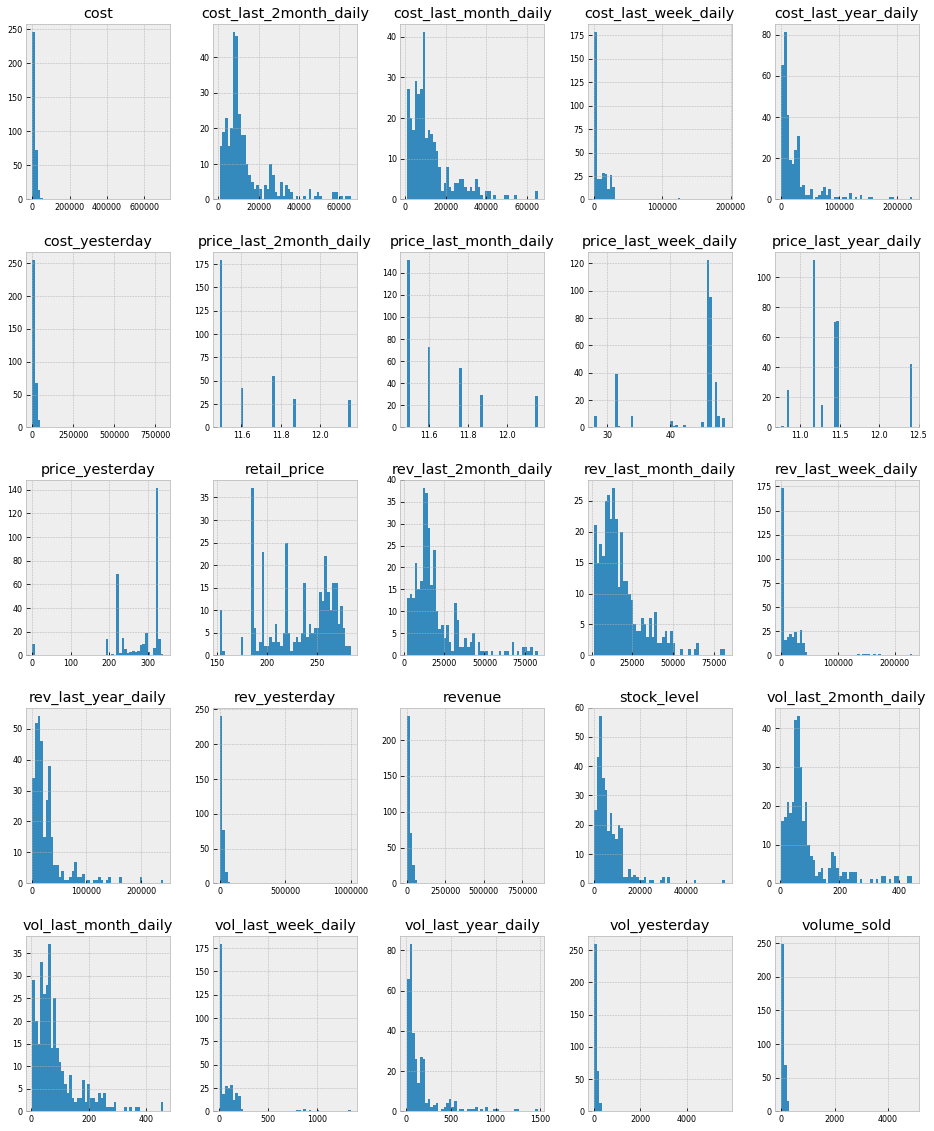

In [26]:
# Check and visualize the distributions
plt.figure(figsize=(9, 8))
data_26104.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

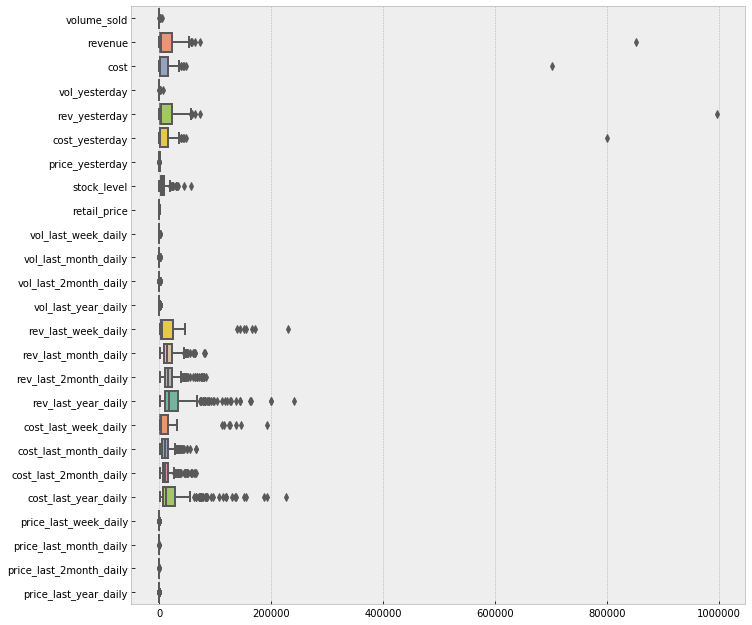

In [27]:
plt.figure(figsize=(11, 11))
ax = sns.boxplot(data=data_26104, orient="h", palette="Set2")

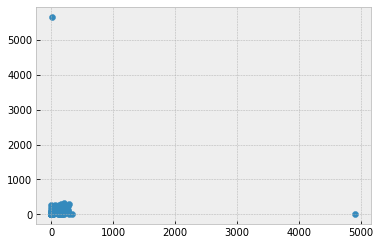

In [28]:
plt.scatter(data_26104.volume_sold, data_26104.vol_yesterday);

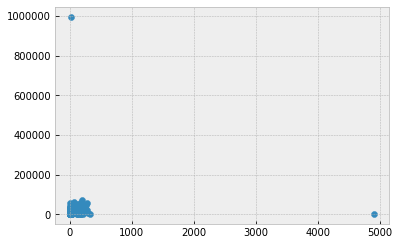

In [29]:
plt.scatter(data_26104.volume_sold, data_26104.rev_yesterday);

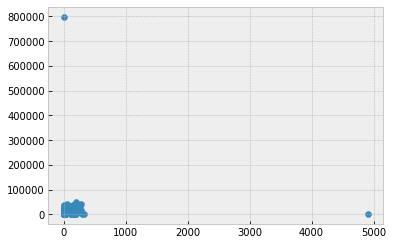

In [30]:
plt.scatter(data_26104.volume_sold, data_26104.cost_yesterday);

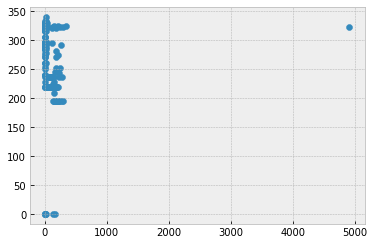

In [31]:
plt.scatter(data_26104.volume_sold, data_26104.price_yesterday);

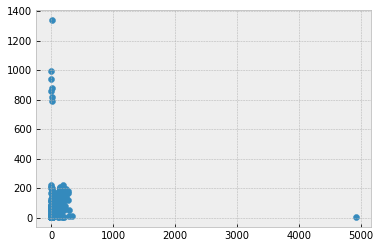

In [32]:
plt.scatter(data_26104.volume_sold, data_26104.vol_last_week_daily);

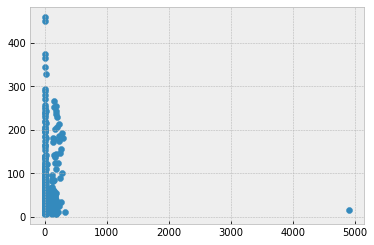

In [33]:
plt.scatter(data_26104.volume_sold, data_26104.vol_last_month_daily);

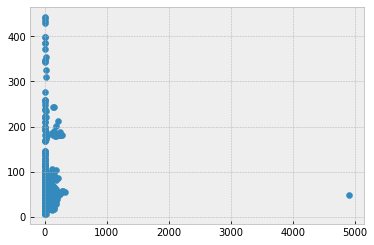

In [37]:
plt.scatter(data_26104.volume_sold, data_26104.vol_last_2month_daily);

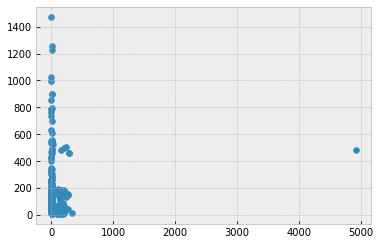

In [38]:
plt.scatter(data_26104.volume_sold, data_26104.vol_last_year_daily);

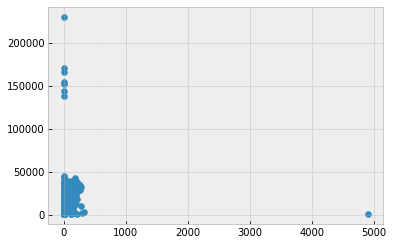

In [39]:
plt.scatter(data_26104.volume_sold, data_26104.rev_last_week_daily);

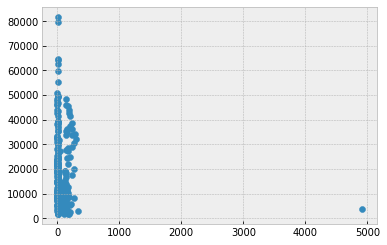

In [40]:
plt.scatter(data_26104.volume_sold, data_26104.rev_last_month_daily);

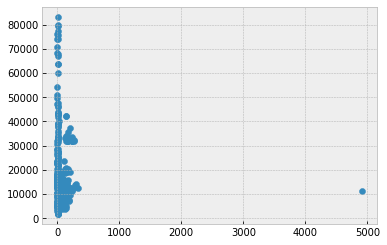

In [41]:
plt.scatter(data_26104.volume_sold, data_26104.rev_last_2month_daily);

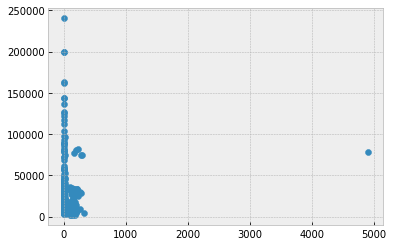

In [42]:
plt.scatter(data_26104.volume_sold, data_26104.rev_last_year_daily);

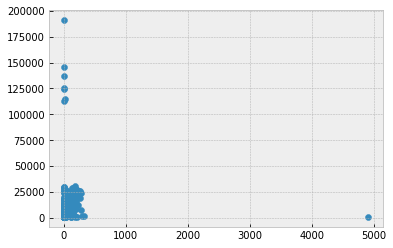

In [43]:
plt.scatter(data_26104.volume_sold, data_26104.cost_last_week_daily);

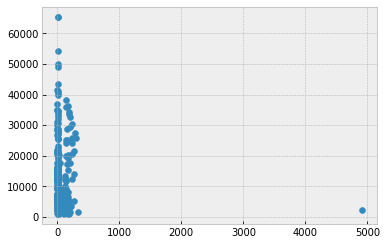

In [44]:
plt.scatter(data_26104.volume_sold, data_26104.cost_last_month_daily);

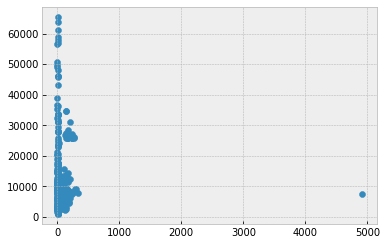

In [45]:
plt.scatter(data_26104.volume_sold, data_26104.cost_last_2month_daily);

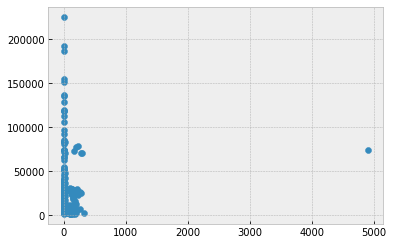

In [46]:
plt.scatter(data_26104.volume_sold, data_26104.cost_last_year_daily);

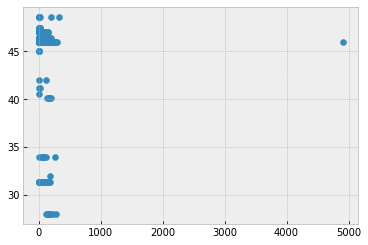

In [47]:
plt.scatter(data_26104.volume_sold, data_26104.price_last_week_daily);

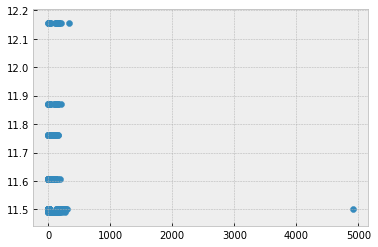

In [48]:
plt.scatter(data_26104.volume_sold, data_26104.price_last_month_daily);

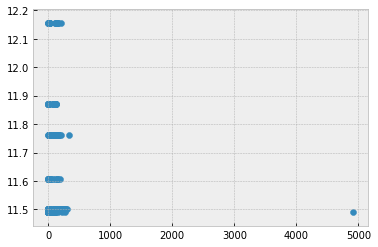

In [49]:
plt.scatter(data_26104.volume_sold, data_26104.price_last_2month_daily);

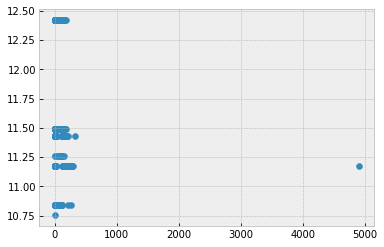

In [50]:
plt.scatter(data_26104.volume_sold, data_26104.price_last_year_daily);

In [51]:
columns = data_26104.columns
percent_missing = data_26104.isnull().sum() * 100 / len(data_26104)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
calendar_date,calendar_date,0.0
volume_sold,volume_sold,0.0
revenue,revenue,0.0
cost,cost,0.0
vol_yesterday,vol_yesterday,0.0
rev_yesterday,rev_yesterday,0.0
cost_yesterday,cost_yesterday,0.0
price_yesterday,price_yesterday,0.0
stock_level,stock_level,0.0
retail_price,retail_price,0.0


In [52]:
data_26104.corr()['volume_sold'].sort_values()


retail_price              -0.222601
price_last_week_daily     -0.078067
rev_last_month_daily      -0.071212
price_yesterday           -0.067288
cost_last_month_daily     -0.058581
vol_last_month_daily      -0.056403
rev_last_2month_daily     -0.048290
price_last_year_daily     -0.048154
vol_last_2month_daily     -0.040605
cost_last_2month_daily    -0.038846
price_last_2month_daily   -0.037908
price_last_month_daily    -0.024034
stock_level                0.014647
cost_last_week_daily       0.016639
vol_last_week_daily        0.017703
rev_last_week_daily        0.022754
cost_yesterday             0.025663
vol_yesterday              0.025675
rev_yesterday              0.030759
rev_last_year_daily        0.041419
vol_last_year_daily        0.051595
cost_last_year_daily       0.051938
revenue                    0.998579
cost                       0.999879
volume_sold                1.000000
Name: volume_sold, dtype: float64

In [53]:
data_26104.corr()

,volume_sold,revenue,cost,vol_yesterday,rev_yesterday,cost_yesterday,price_yesterday,stock_level,retail_price,vol_last_week_daily,vol_last_month_daily,vol_last_2month_daily,vol_last_year_daily,rev_last_week_daily,rev_last_month_daily,rev_last_2month_daily,rev_last_year_daily,cost_last_week_daily,cost_last_month_daily,cost_last_2month_daily,cost_last_year_daily,price_last_week_daily,price_last_month_daily,price_last_2month_daily,price_last_year_daily
volume_sold,1.000000,0.998579,0.999879,0.025675,0.030759,0.025663,-0.067288,0.014647,-0.222601,0.017703,-0.056403,-0.040605,0.051595,0.022754,-0.071212,-0.048290,0.041419,0.016639,-0.058581,-0.038846,0.051938,-0.078067,-0.024034,-0.037908,-0.048154
revenue,0.998579,1.000000,0.998750,0.031907,0.038378,0.032101,-0.088305,0.011988,-0.245176,0.023028,-0.067481,-0.048322,0.040683,0.030050,-0.083864,-0.056661,0.029285,0.022092,-0.069903,-0.046758,0.040936,-0.097479,-0.013801,-0.032460,-0.047391
cost,0.999879,0.998750,1.000000,0.025149,0.030329,0.025244,-0.067765,0.013552,-0.222604,0.016439,-0.060475,-0.043043,0.049504,0.021661,-0.075277,-0.050370,0.039188,0.015552,-0.062557,-0.041259,0.049755,-0.079064,-0.022118,-0.035956,-0.050019
vol_yesterday,0.025675,0.031907,0.025149,1.000000,0.999006,0.999893,-0.062004,0.009889,-0.126816,0.329843,0.097249,-0.028729,0.070901,0.333926,0.083110,-0.033545,0.062672,0.324265,0.095500,-0.026349,0.070926,-0.086849,-0.024921,-0.036041,-0.045086
rev_yesterday,0.030759,0.038378,0.030329,0.999006,1.000000,0.999257,-0.077522,0.006788,-0.149450,0.335067,0.089141,-0.033857,0.062142,0.341445,0.074309,-0.038926,0.053190,0.329764,0.087298,-0.031577,0.062104,-0.106526,-0.015805,-0.030738,-0.044082
cost_yesterday,0.025663,0.032101,0.025244,0.999893,0.999257,1.000000,-0.064329,0.008611,-0.128991,0.329382,0.093677,-0.030975,0.068667,0.333849,0.079543,-0.035491,0.060293,0.324012,0.092039,-0.028544,0.068627,-0.089454,-0.022881,-0.033984,-0.046907
price_yesterday,-0.067288,-0.088305,-0.067765,-0.062004,-0.077522,-0.064329,1.000000,0.074314,0.343714,-0.136747,0.091236,0.028428,0.136165,-0.163556,0.113906,0.034193,0.150900,-0.137261,0.093675,0.027279,0.135278,0.440519,-0.014773,-0.053862,0.009653
stock_level,0.014647,0.011988,0.013552,0.009889,0.006788,0.008611,0.074314,1.000000,-0.011642,0.061253,0.305674,0.239403,0.476210,0.052267,0.308467,0.288061,0.484791,0.060047,0.308689,0.252227,0.484355,0.072105,-0.351346,-0.391472,-0.286095
retail_price,-0.222601,-0.245176,-0.222604,-0.126816,-0.149450,-0.128991,0.343714,-0.011642,1.000000,-0.205558,0.053650,0.031063,0.156319,-0.237473,0.070778,0.039176,0.171466,-0.207139,0.055355,0.032508,0.152437,0.405218,-0.025845,-0.076472,0.068534
vol_last_week_daily,0.017703,0.023028,0.016439,0.329843,0.335067,0.329382,-0.136747,0.061253,-0.205558,1.000000,0.376774,0.015163,0.264468,0.996532,0.347427,0.018114,0.252006,0.999634,0.379513,0.026714,0.266723,-0.212725,-0.063082,-0.110747,-0.108972


In [54]:
#data_26104["revenue"]=((data_26104["revenue"]-data_26104["revenue"].min())/(data_26104["revenue"].max()-data_26104["revenue"].min()))*1
data_26104_copy = data_26104.copy()
data_26104_copy.drop(['calendar_date'], axis=1, inplace=True)


In [55]:
data_26104_copy.describe()

,volume_sold,revenue,cost,vol_yesterday,rev_yesterday,cost_yesterday,price_yesterday,stock_level,retail_price,vol_last_week_daily,vol_last_month_daily,vol_last_2month_daily,vol_last_year_daily,rev_last_week_daily,rev_last_month_daily,rev_last_2month_daily,rev_last_year_daily,cost_last_week_daily,cost_last_month_daily,cost_last_2month_daily,cost_last_year_daily,price_last_week_daily,price_last_month_daily,price_last_2month_daily,price_last_year_daily
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,66.558209,13888.572451,9590.416791,70.800000,14810.715982,10173.531830,274.290799,6591.483582,230.945119,76.333049,86.491365,92.089446,153.915352,15901.060794,18075.265463,19359.872581,29110.518199,11000.878966,12455.807425,13272.120086,24057.233555,43.663267,11.651151,11.644264,11.427340
std,274.738518,48174.506749,39291.882788,314.806221,55841.875444,44467.227567,66.979869,6469.573229,33.893073,144.012986,75.771529,84.455225,208.145717,25617.687160,13609.221589,15460.937794,32714.665929,20659.556158,10694.741365,11839.776260,31673.318339,5.740537,0.197000,0.204251,0.417957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.650888,2.142857,5.178571,5.392857,4.785714,627.137714,1568.586857,1627.994214,1412.273929,327.078857,797.463429,787.735179,846.245786,27.928571,11.488911,11.488911,10.757429
25%,4.000000,1287.379000,634.186500,5.000000,1509.944250,741.805000,218.960000,2548.000000,196.500444,8.214286,38.625000,45.142857,42.107143,2448.112607,8832.521812,10597.031089,10393.682955,1234.404286,5587.530125,6532.939571,6533.117750,45.955643,11.500000,11.500000,11.171429
50%,10.000000,2831.633500,1392.289000,11.000000,3360.760000,1649.721000,296.665500,4825.000000,237.325444,17.285714,64.214286,64.464286,72.071429,4916.028214,14271.099554,14667.731268,17918.660518,2545.404286,9383.041786,9410.033393,11392.858571,46.000000,11.606375,11.500000,11.429768
75%,103.000000,23056.488000,15001.098500,105.500000,23223.652000,15036.500500,322.000000,9016.000000,260.298629,110.428571,103.428571,99.767857,176.321429,24179.440000,22915.443170,22212.947393,33667.169589,15733.041500,15116.828179,14635.758821,28558.879250,46.425500,11.762857,11.762857,11.488911
max,4909.000000,851529.000000,702025.168000,5660.000000,996590.000000,798917.024000,340.400000,56709.000000,283.633111,1341.142857,460.392857,443.464286,1473.464286,230448.772714,81798.357821,83248.656071,241141.982000,191385.011571,65465.321857,65514.943857,225527.728857,48.628571,12.157143,12.157143,12.420000


In [56]:
data_26104_copy[data_26104_copy < 0] = 0

In [57]:
data_26104_copy.describe()

,volume_sold,revenue,cost,vol_yesterday,rev_yesterday,cost_yesterday,price_yesterday,stock_level,retail_price,vol_last_week_daily,vol_last_month_daily,vol_last_2month_daily,vol_last_year_daily,rev_last_week_daily,rev_last_month_daily,rev_last_2month_daily,rev_last_year_daily,cost_last_week_daily,cost_last_month_daily,cost_last_2month_daily,cost_last_year_daily,price_last_week_daily,price_last_month_daily,price_last_2month_daily,price_last_year_daily
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,66.558209,13888.572451,9590.416791,70.800000,14810.715982,10173.531830,274.290799,6591.483582,230.945119,76.333049,86.491365,92.089446,153.915352,15901.060794,18075.265463,19359.872581,29110.518199,11000.878966,12455.807425,13272.120086,24057.233555,43.663267,11.651151,11.644264,11.427340
std,274.738518,48174.506749,39291.882788,314.806221,55841.875444,44467.227567,66.979869,6469.573229,33.893073,144.012986,75.771529,84.455225,208.145717,25617.687160,13609.221589,15460.937794,32714.665929,20659.556158,10694.741365,11839.776260,31673.318339,5.740537,0.197000,0.204251,0.417957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.650888,2.142857,5.178571,5.392857,4.785714,627.137714,1568.586857,1627.994214,1412.273929,327.078857,797.463429,787.735179,846.245786,27.928571,11.488911,11.488911,10.757429
25%,4.000000,1287.379000,634.186500,5.000000,1509.944250,741.805000,218.960000,2548.000000,196.500444,8.214286,38.625000,45.142857,42.107143,2448.112607,8832.521812,10597.031089,10393.682955,1234.404286,5587.530125,6532.939571,6533.117750,45.955643,11.500000,11.500000,11.171429
50%,10.000000,2831.633500,1392.289000,11.000000,3360.760000,1649.721000,296.665500,4825.000000,237.325444,17.285714,64.214286,64.464286,72.071429,4916.028214,14271.099554,14667.731268,17918.660518,2545.404286,9383.041786,9410.033393,11392.858571,46.000000,11.606375,11.500000,11.429768
75%,103.000000,23056.488000,15001.098500,105.500000,23223.652000,15036.500500,322.000000,9016.000000,260.298629,110.428571,103.428571,99.767857,176.321429,24179.440000,22915.443170,22212.947393,33667.169589,15733.041500,15116.828179,14635.758821,28558.879250,46.425500,11.762857,11.762857,11.488911
max,4909.000000,851529.000000,702025.168000,5660.000000,996590.000000,798917.024000,340.400000,56709.000000,283.633111,1341.142857,460.392857,443.464286,1473.464286,230448.772714,81798.357821,83248.656071,241141.982000,191385.011571,65465.321857,65514.943857,225527.728857,48.628571,12.157143,12.157143,12.420000


In [58]:
# a number "a" from the vector "x" is an outlier if 
# a > median(x)+1.5*iqr(x) or a < median-1.5*iqr(x)
# iqr: interquantile range = third interquantile - first interquantile
def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

In [59]:
# Replace the upper outlier(s) with the 95th percentile and the lower one(s) with the 5th percentile 
def replace(x):   # x is a vector
       out = x[outliers(x)]
       return x.replace(to_replace = [out.min(),out.max()], 
                        #value = [np.mean,np.mean])
                        value = [np.percentile(x,5),np.percentile(x,95)])

In [60]:
data_26104_copy = data_26104_copy.apply(replace,axis=1)

In [61]:
data_26104_copy.describe()

,volume_sold,revenue,cost,vol_yesterday,rev_yesterday,cost_yesterday,price_yesterday,stock_level,retail_price,vol_last_week_daily,vol_last_month_daily,vol_last_2month_daily,vol_last_year_daily,rev_last_week_daily,rev_last_month_daily,rev_last_2month_daily,rev_last_year_daily,cost_last_week_daily,cost_last_month_daily,cost_last_2month_daily,cost_last_year_daily,price_last_week_daily,price_last_month_daily,price_last_2month_daily,price_last_year_daily
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,66.558209,11239.357634,8939.337931,70.800000,11254.335416,9570.138563,274.290799,5905.404214,230.945119,76.333049,86.491365,92.089446,153.915352,12986.689748,16117.143029,16094.261287,25462.226064,10788.555488,10043.370892,12371.678826,21663.901134,43.663267,11.651151,11.644264,11.427340
std,274.738518,33613.256265,39256.292918,314.806221,38155.963627,44423.163431,66.979869,6051.216941,33.893073,144.012986,75.771529,84.455225,208.145717,21701.368427,13735.159009,14392.729060,28545.755290,20643.322963,10229.276935,12010.348485,31713.709662,5.740537,0.197000,0.204251,0.417957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.650888,2.142857,5.178571,5.392857,4.785714,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000,0.000000,27.928571,11.488911,11.488911,10.757429
25%,4.000000,1087.135250,606.108500,5.000000,1140.437750,705.069500,218.960000,2259.500000,196.500444,8.214286,38.625000,45.142857,42.107143,2077.143143,7544.639893,6891.250743,8577.652446,1220.452357,2899.130107,5140.901482,4383.925304,45.955643,11.500000,11.500000,11.171429
50%,10.000000,2491.797000,1292.295000,11.000000,2793.626000,1574.895000,296.665500,4063.000000,237.325444,17.285714,64.214286,64.464286,72.071429,3846.644857,13219.129250,12946.797339,16563.422071,2469.804286,7594.172643,9138.410536,9776.287571,46.000000,11.606375,11.500000,11.429768
75%,103.000000,17412.840000,13197.744000,105.500000,17078.880000,14262.973000,322.000000,8153.500000,260.298629,110.428571,103.428571,99.767857,176.321429,18414.750393,21848.574205,19277.659875,30231.413571,15317.428786,13064.814339,13919.130661,27348.381179,46.425500,11.762857,11.762857,11.488911
max,4909.000000,577309.367629,702025.168000,5660.000000,667980.660143,798917.024000,340.400000,47239.861671,283.633111,1341.142857,460.392857,443.464286,1473.464286,181983.195714,81798.357821,77466.046607,186932.183086,191385.011571,65465.321857,65514.943857,225527.728857,48.628571,12.157143,12.157143,12.420000


In [62]:
data_26104_copy.columns

Index(['volume_sold', 'revenue', 'cost', 'vol_yesterday', 'rev_yesterday',
       'cost_yesterday', 'price_yesterday', 'stock_level', 'retail_price',
       'vol_last_week_daily', 'vol_last_month_daily', 'vol_last_2month_daily',
       'vol_last_year_daily', 'rev_last_week_daily', 'rev_last_month_daily',
       'rev_last_2month_daily', 'rev_last_year_daily', 'cost_last_week_daily',
       'cost_last_month_daily', 'cost_last_2month_daily',
       'cost_last_year_daily', 'price_last_week_daily',
       'price_last_month_daily', 'price_last_2month_daily',
       'price_last_year_daily'],
      dtype='object')

In [63]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'cost_yesterday' , 'price_yesterday',
       'vol_last_week_daily', 'vol_last_month_daily', 'vol_last_2month_daily',
       'vol_last_year_daily', 'rev_last_week_daily', 'rev_last_month_daily',
       'rev_last_2month_daily', 'rev_last_year_daily', 'cost_last_week_daily',
       'cost_last_month_daily', 'cost_last_2month_daily',
       'cost_last_year_daily', 'price_last_week_daily',
       'price_last_month_daily', 'price_last_2month_daily',
       'price_last_year_daily']]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11)  
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
print("Mean squared train error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = lm.predict(X_test)
print("Mean squared test error: %.2f"
      % mean_squared_error(y_test, y_pred))
lm.score(X_test,y_test)

Mean squared train error: 67043.07
Mean squared test error: 16376.99


-2.557138128202826

In [64]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'cost_yesterday' , 'price_yesterday',
       'vol_last_week_daily', 'vol_last_month_daily',
        'rev_last_week_daily', 'rev_last_month_daily', 'cost_last_week_daily',
       'cost_last_month_daily', 'price_last_week_daily',
       'price_last_month_daily']]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11)  
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
print("Mean squared train error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = lm.predict(X_test)
print("Mean squared test error: %.2f"
      % mean_squared_error(y_test, y_pred))
lm.score(X_test,y_test)

Mean squared train error: 90989.50
Mean squared test error: 3463.94


0.24762122284999355

In [65]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'cost_yesterday' , 'price_yesterday',
       'vol_last_week_daily',
        'rev_last_week_daily', 'cost_last_week_daily',
        'price_last_week_daily',
       ]]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11)  
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
print("Mean squared train error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = lm.predict(X_test)
print("Mean squared test error: %.2f"
      % mean_squared_error(y_test, y_pred))
lm.score(X_test,y_test)

Mean squared train error: 91614.01
Mean squared test error: 3775.26


0.17999978788617432

In [66]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'cost_yesterday' , 'price_yesterday','price_last_month_daily']]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11)  
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
print("Mean squared train error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = lm.predict(X_test)
print("Mean squared test error: %.2f"
      % mean_squared_error(y_test, y_pred))
lm.score(X_test,y_test)

Mean squared train error: 91854.98
Mean squared test error: 4112.56


0.10673802502289152

In [67]:
independent_var = data_26104_copy[['vol_yesterday', 'vol_last_month_daily','price_yesterday']]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11)  
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
print("Mean squared train error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = lm.predict(X_test)
print("Mean squared test error: %.2f"
      % mean_squared_error(y_test, y_pred))
lm.score(X_test,y_test)

Mean squared train error: 92298.83
Mean squared test error: 4268.13


0.07294836351867795

In [68]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'price_yesterday',
       'vol_last_week_daily', 'vol_last_month_daily', 'vol_last_2month_daily',
       'vol_last_year_daily', 'rev_last_week_daily', 'rev_last_month_daily',
       'rev_last_2month_daily', 'rev_last_year_daily', 'price_last_week_daily',
       'price_last_month_daily', 'price_last_2month_daily',
       'price_last_year_daily']]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11)  
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
print("Mean squared train error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = lm.predict(X_test)
print("Mean squared test error: %.2f"
      % mean_squared_error(y_test, y_pred))
lm.score(X_test,y_test)

Mean squared train error: 86530.20
Mean squared test error: 7805.87


-0.6954619907808244

In [69]:
independent_var = data_26104_copy[['vol_yesterday', 'rev_yesterday']]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11)  
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
print("Mean squared train error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = lm.predict(X_test)
print("Mean squared test error: %.2f"
      % mean_squared_error(y_test, y_pred))
lm.score(X_test,y_test)

Mean squared train error: 92225.48
Mean squared test error: 4180.97


0.09187843716001487

In [70]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.38084775  0.00333971]


In [79]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 34857.58


0.37454124374189823

In [71]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'cost_yesterday' , 'price_yesterday',
       'vol_last_week_daily', 'vol_last_month_daily', 'vol_last_2month_daily',
       'vol_last_year_daily', 'rev_last_week_daily', 'rev_last_month_daily',
       'rev_last_2month_daily', 'rev_last_year_daily', 'cost_last_week_daily',
       'cost_last_month_daily', 'cost_last_2month_daily',
       'cost_last_year_daily', 'price_last_week_daily',
       'price_last_month_daily', 'price_last_2month_daily',
       'price_last_year_daily']]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11) 
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = clf.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
clf.score(X_test,y_test)

Mean squared error: 0.00
Mean squared error: 4798.49


-0.04224889177396696

In [72]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'cost_yesterday' , 'price_yesterday',
       'vol_last_week_daily', 'vol_last_month_daily',
        'rev_last_week_daily', 'rev_last_month_daily', 'cost_last_week_daily',
       'cost_last_month_daily', 'price_last_week_daily',
       'price_last_month_daily']]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11) 
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = clf.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
clf.score(X_test,y_test)

Mean squared error: 0.00
Mean squared error: 342670.03


-73.42909540421026

In [73]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'cost_yesterday' , 'price_yesterday',
       'vol_last_week_daily',
        'rev_last_week_daily', 'cost_last_week_daily',
        'price_last_week_daily',
       ]]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11) 
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = clf.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
clf.score(X_test,y_test)

Mean squared error: 0.00
Mean squared error: 3020.09


0.34402628233712973

In [74]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'cost_yesterday' , 'price_yesterday','price_last_month_daily']]


target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11) 
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = clf.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
clf.score(X_test,y_test)

Mean squared error: 0.28
Mean squared error: 3140.58


0.31785489361339736

In [75]:
independent_var = data_26104_copy[['vol_yesterday', 'vol_last_month_daily','price_yesterday']]


target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11) 
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = clf.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
clf.score(X_test,y_test)

Mean squared error: 0.00
Mean squared error: 2797.61


0.3923491759722041

In [76]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday']]

target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11) 
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = clf.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
clf.score(X_test,y_test)

Mean squared error: 78.61
Mean squared error: 359457.90


-77.07547861009137

In [77]:
independent_var = data_26104_copy[['vol_yesterday','rev_yesterday', 'cost_yesterday' , 'price_yesterday','price_last_month_daily']]


target_var = data_26104_copy['volume_sold']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20, random_state = 11) 


In [78]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'Decision Tree',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = tree.DecisionTreeRegressor()
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model5 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
        
        print(model.score(X_test,y_test))
        
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [79]:
results = evaluate(X_train, X_test, y_train, y_test)

0.10673802502289152
0.2553003145457472
-12.875725333851697
-0.38205262435771203
-0.36445466803666293


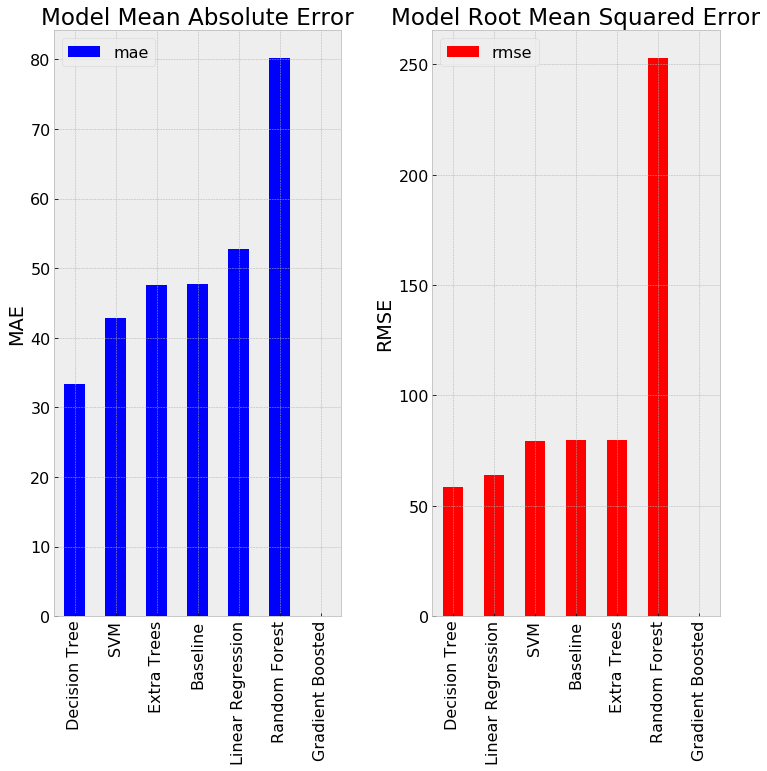

In [80]:
plt.figure(figsize=(11, 11))
plt.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ols_formula = 'Volume = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'Volume = 784.27 + 0.01 * rev_yesterday + 0.00 * cost_yesterday + -0.00 * price_yesterday + -0.24 * price_last_month_daily'

In [82]:

model = make_pipeline(PolynomialFeatures(degree=2,include_bias=False), LinearRegression())
y_poly = model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred_train))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
model.score(X_test,y_test)

Mean squared error: 90016.91
Mean squared error: 4109.72


0.10735471426893906